# get padded video (dont use)

In [2]:
import os
PATH = './doggy-frames'
fnames = os.listdir(PATH)
fnames.sort()

In [3]:
import numpy as np
import cv2
from tqdm.notebook import tqdm
WIDTH = 1920
HEIGHT = 1080
NUM_FRAMES = len(fnames)
WINDOW_SIZE = 5
video = np.zeros((NUM_FRAMES, HEIGHT + (int(WINDOW_SIZE/2)*2), WIDTH + (int(WINDOW_SIZE/2)*2), 3))
print(video[0].shape)
count = 0
for fname in tqdm(fnames):
    frame = cv2.imread(os.path.join(PATH, fname))
    video[count] = np.pad(frame, pad_width=((int(WINDOW_SIZE/2), int(WINDOW_SIZE/2)), (int(WINDOW_SIZE/2), int(WINDOW_SIZE/2)), (0,0)))
    count += 1
    

(1084, 1924, 3)


  0%|          | 0/300 [00:00<?, ?it/s]

# vid stats 5 frames (unnecessary)

In [44]:
from tqdm import tqdm
import pickle
OFFSET = int(WINDOW_SIZE/2)
padded_video_original = np.copy(video)
NUM_FRAMES_SAMPLE = 5
padded_vid_sample = video[0:NUM_FRAMES_SAMPLE,:,:,0].squeeze()


In [45]:

sigma_video = np.zeros((NUM_FRAMES_SAMPLE, HEIGHT, WIDTH))
mean_video = np.zeros((NUM_FRAMES_SAMPLE, HEIGHT, WIDTH))
for frame_idx in tqdm(range(NUM_FRAMES_SAMPLE)):
    for row in tqdm(range(HEIGHT)):
        for col in range(WIDTH):
            row_actual = row + OFFSET
            col_actual = col + OFFSET
            window = padded_vid_sample[frame_idx,row_actual - OFFSET:row_actual + OFFSET + 1,col_actual - OFFSET:col_actual + OFFSET + 1]
            assert window.shape == (WINDOW_SIZE, WINDOW_SIZE)
            if window[OFFSET][OFFSET] == 0.0:
              print(window)
            sigma_video[frame_idx][row][col] = np.std(window, dtype=np.float64)
            mean_video[frame_idx][row][col] = np.mean(window, dtype=np.float64)
with open('./sigma_video_first_5_1920x1080.pickle', 'wb') as outputfile:
  pickle.dump(sigma_video, outputfile)
with open('./mean_video_first_5_1920x1080.pickle', 'wb') as outputfile:
  pickle.dump(mean_video, outputfile)

100%|██████████| 5/5 [07:14<00:00, 86.98s/it]


# vid stats 1 frame

## get vid frames

In [91]:
import cv2
vidcap = cv2.VideoCapture('/Users/labarca/dv-hw3/doggy-video/ShakeNDry_1920x1080_30fps_420_8bit_AVC_MP4.mp4')
success, image = vidcap.read()
count = 0
while success:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
  cv2.imwrite("/Users/labarca/dv-hw3/doggy-frames/frame%d.png" % count, image)     # save frame as JPEG file      
  success, image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

## calc stats

In [138]:
from tqdm.notebook import tqdm
import pickle
import os
WINDOW_SIZE = 5
vidcap = cv2.VideoCapture('/Users/labarca/dv-hw3/doggy-video/ShakeNDry_1920x1080_30fps_420_8bit_AVC_MP4.mp4')
_, frame = vidcap.read()
del vidcap
HEIGHT, WIDTH = frame.shape[0], frame.shape[1]
frame_sigma_2 = cv2.GaussianBlur(np.copy(frame), (WINDOW_SIZE,WINDOW_SIZE), 2)
frame_sigma_5 = cv2.GaussianBlur(np.copy(frame), (WINDOW_SIZE,WINDOW_SIZE), 5)
frame_sigma_10 = cv2.GaussianBlur(np.copy(frame), (WINDOW_SIZE,WINDOW_SIZE), 10)
frame_sigma_20 = cv2.GaussianBlur(np.copy(frame), (WINDOW_SIZE,WINDOW_SIZE), 20)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
frame_sigma_2 = cv2.cvtColor(frame_sigma_2, cv2.COLOR_BGR2YUV)
frame_sigma_5 = cv2.cvtColor(frame_sigma_5, cv2.COLOR_BGR2YUV)
frame_sigma_10 = cv2.cvtColor(frame_sigma_10, cv2.COLOR_BGR2YUV)
frame_sigma_20 = cv2.cvtColor(frame_sigma_20, cv2.COLOR_BGR2YUV)

# frames = [frame[:,:,0], frame_sigma_2[:,:,0], frame_sigma_5[:,:,0], frame_sigma_10[:,:,0], frame_sigma_20[:,:,0]]
frames = np.copy(frame)
frames = np.expand_dims(frames, axis=0)
frames = np.append(frames, [frame_sigma_2, frame_sigma_5, frame_sigma_10, frame_sigma_20], axis=0)

mean_frames = np.zeros((frames.shape[0], HEIGHT, WIDTH))
sigma_frames = np.zeros((frames.shape[0], HEIGHT, WIDTH))
for frame_idx in tqdm(range(0, frames.shape[0])):
  for row in tqdm(np.arange(WINDOW_SIZE//2, HEIGHT-WINDOW_SIZE//2)):
    for col in np.arange(WINDOW_SIZE//2, WIDTH-WINDOW_SIZE//2):
        window = frames[frame_idx,row - WINDOW_SIZE//2:row + WINDOW_SIZE//2 + 1,col - WINDOW_SIZE//2:col + WINDOW_SIZE//2 + 1,0]
        assert window.shape == (WINDOW_SIZE, WINDOW_SIZE), f"{window.shape}"
        sigma_frames[frame_idx][row][col] = np.std(np.copy(window))
        mean_frames[frame_idx][row][col] = np.mean(np.copy(window))


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

In [139]:
if os.path.exists('./all_sigma_1920x1080.pickle'):
  os.remove('./all_sigma_1920x1080.pickle')
if os.path.exists('./all_mean_1920x1080.pickle'):
  os.remove('./all_mean_1920x1080.pickle')
if os.path.exists('./all_coeffs_1920x1080.pickle'):
  os.remove('./all_coeffs_1920x1080.pickle')

normalized_coeffs = np.zeros((frames.shape[0], HEIGHT-WINDOW_SIZE+1, WIDTH-WINDOW_SIZE+1))
sigma_frames_save = np.zeros((frames.shape[0], HEIGHT-WINDOW_SIZE+1, WIDTH-WINDOW_SIZE+1))
mean_frames_save = np.zeros((frames.shape[0], HEIGHT-WINDOW_SIZE+1, WIDTH-WINDOW_SIZE+1))
print(normalized_coeffs.shape, sigma_frames_save.shape, mean_frames_save.shape)
for frame_idx in range(frames.shape[0]):
    sigma_frame = sigma_frames[frame_idx,WINDOW_SIZE//2:HEIGHT-WINDOW_SIZE//2,WINDOW_SIZE//2:WIDTH-WINDOW_SIZE//2]
    mean_frame = mean_frames[frame_idx,WINDOW_SIZE//2:HEIGHT-WINDOW_SIZE//2,WINDOW_SIZE//2:WIDTH-WINDOW_SIZE//2]
    reg_frame = frames[frame_idx,WINDOW_SIZE//2:HEIGHT-WINDOW_SIZE//2,WINDOW_SIZE//2:WIDTH-WINDOW_SIZE//2,0]
    normalized_coeffs[frame_idx]= (reg_frame - mean_frame) / (sigma_frame + 1e-20)
    mean_frames_save[frame_idx] = mean_frame
    sigma_frames_save[frame_idx] = sigma_frame
with open('./all_sigma_1920x1080.pickle', 'wb') as outputfile:
  pickle.dump(sigma_frames_save, outputfile)
with open('./all_mean_1920x1080.pickle', 'wb') as outputfile:
  pickle.dump(mean_frames_save, outputfile)
with open('./all_coeffs_1920x1080.pickle', 'wb') as outputfile:
  pickle.dump(normalized_coeffs, outputfile)

(5, 1076, 1916) (5, 1076, 1916) (5, 1076, 1916)


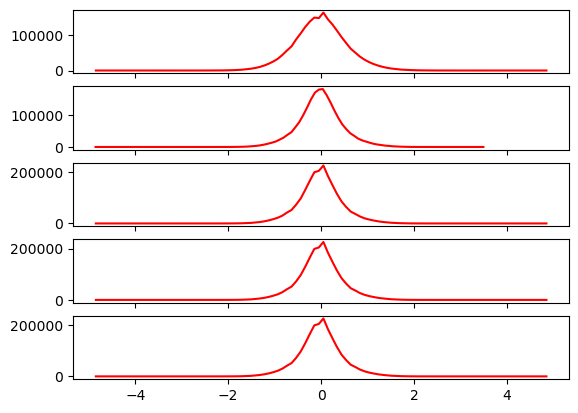

In [148]:
fig, axs = plt.subplots((normalized_coeffs.shape[0]), sharex=True)
for frame_idx in range(normalized_coeffs.shape[0]):
    y, bin_edges = np.histogram(normalized_coeffs[frame_idx].flatten(), bins=100)
    bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    axs[frame_idx].plot(bincenters, y, '-', c='red')


0:  -4.89897948556636 4.89897948556636
1:  -4.89897948556636 3.5355339059327378
2:  -4.89897948556636 4.89897948556636
3:  -4.89897948556636 4.89897948556636
4:  -4.89897948556636 4.89897948556636


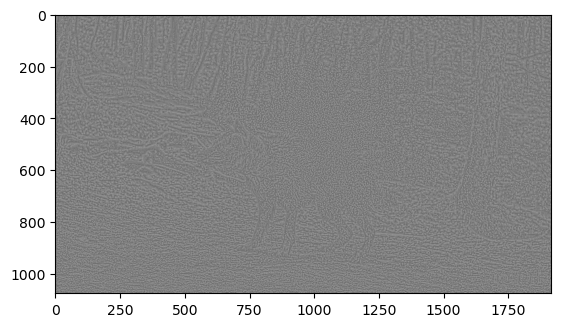

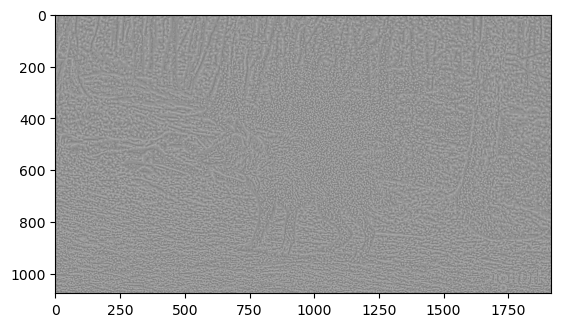

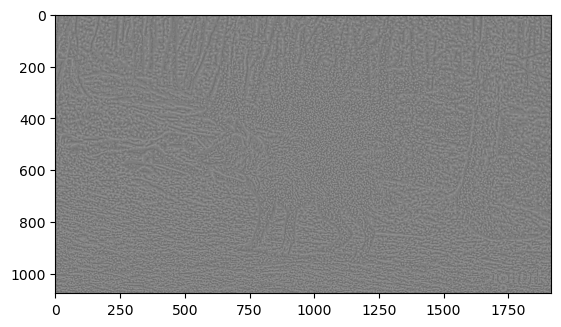

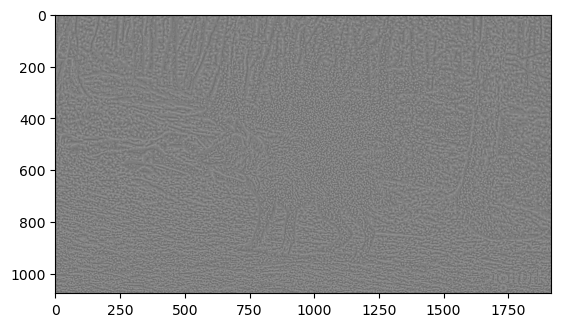

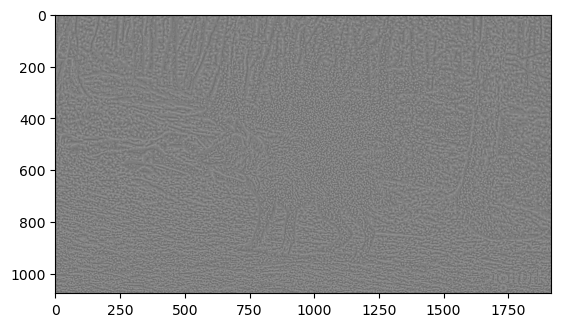

In [146]:
# import matplotlib.pyplot as plt
# print(sigma_frames_save[0])
# with open('./all_coeffs_1920x1080.pickle', 'rb') as inputfile:
#     normalized_coeffs = pickle.load(inputfile)
for frame_idx in range(normalized_coeffs.shape[0]):
    print(f"{frame_idx}: ", np.amin(normalized_coeffs[frame_idx]), np.amax(normalized_coeffs[frame_idx]))
    plt.figure()
    plt.imshow(normalized_coeffs[frame_idx], cmap='gray')

# plt.imshow(normalized_coeffs[0], cmap='gray')


-4.89897948556636 4.89897948556636


# EBMA

In [66]:
import cv2
import numpy as np
from tqdm.notebook import tqdm
# I will only make this work for this particular pair of frames, cause it divides nicely. 
# Other pairs are not so nice.
frame1 = cv2.imread('/Users/labarca/dv-hw3/other-data/Grove2/frame10.png')
frame2 = cv2.imread('/Users/labarca/dv-hw3/other-data/Grove2/frame11.png')
print(frame1.shape)
HEIGHT, WIDTH = frame1.shape[0], frame1.shape[1]
BLOCK_SIZE = 17
SEARCH_SPACE = 48
SEARCH_SPACE_HALF = 24
H_BLOCKS, W_BLOCKS = int(frame1.shape[0]/BLOCK_SIZE), int(frame1.shape[1]/BLOCK_SIZE)  
mv_x = np.zeros((HEIGHT, WIDTH))
mv_y = np.zeros((HEIGHT, WIDTH))
predicted_img = np.zeros(frame1.shape)
for row in tqdm(np.arange(BLOCK_SIZE//2, HEIGHT-BLOCK_SIZE//2)):
    for col in np.arange(BLOCK_SIZE//2, WIDTH-BLOCK_SIZE//2):
        anchor_block = frame1[row-BLOCK_SIZE//2:row + BLOCK_SIZE//2, col-BLOCK_SIZE//2:col+BLOCK_SIZE//2]
        min_sad = np.Inf
        best_block = np.zeros((anchor_block.shape))
        for search_row in np.arange(-SEARCH_SPACE_HALF, SEARCH_SPACE_HALF + 1):
            for search_col in np.arange(-SEARCH_SPACE_HALF, SEARCH_SPACE_HALF + 1):
                midpt_candidate_block = ((row + search_row), (col + search_col))
                if midpt_candidate_block[0] < BLOCK_SIZE//2 or midpt_candidate_block[0] >= HEIGHT-BLOCK_SIZE//2:
                    continue
                elif midpt_candidate_block[1] < BLOCK_SIZE//2 or midpt_candidate_block[1] >= WIDTH - BLOCK_SIZE//2:
                    continue
                # we continue in either case above since the presence of 0's 
                # will guarantee that whatever SAD computed from this candidate block 
                # will not be the minimum SAD.
                candidate_block = frame2[midpt_candidate_block[0]-BLOCK_SIZE//2:midpt_candidate_block[0]+BLOCK_SIZE//2,\
                     midpt_candidate_block[1]-BLOCK_SIZE//2:midpt_candidate_block[1]+BLOCK_SIZE//2]
                assert candidate_block.shape == anchor_block.shape, f"shapes not equal, {(row, col)},{(search_row, search_col)}"
                cur_sad = np.sum(np.abs(np.subtract(anchor_block, candidate_block)))
                if cur_sad < min_sad:
                    min_sad = cur_sad
                    best_block = candidate_block
                    best_candidate_block_midpt = midpt_candidate_block
        mv_y[row][col] = midpt_candidate_block[0] - row
        mv_x[row][col] = midpt_candidate_block[1] - col
        predicted_img[row-BLOCK_SIZE//2:row+BLOCK_SIZE//2, col-BLOCK_SIZE//2:col+BLOCK_SIZE//2] = best_block
with open('./predicted_img.pickle', 'wb') as outputfile:
  pickle.dump(predicted_img, outputfile)
with open('./mv_x.pickle', 'wb') as outputfile:
  pickle.dump(mv_x, outputfile)
with open('./mv_y.pickle', 'wb') as outputfile:
  pickle.dump(mv_y, outputfile)

  0%|          | 0/464 [00:00<?, ?it/s]

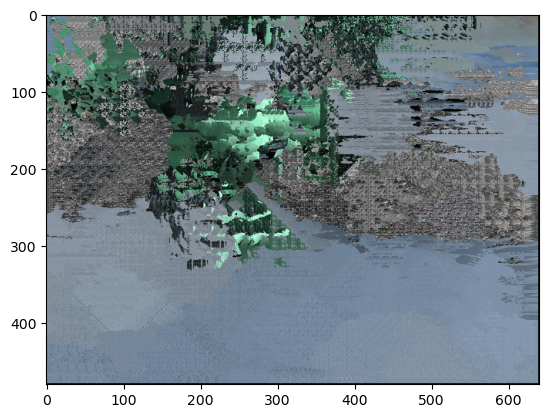

In [80]:
with open('./predicted_img.pickle', 'rb') as inputfile:
  predicted_img = pickle.load(inputfile)
plt.imshow(predicted_img.astype('uint8'))

# LOG SEARCH


In [77]:
import cv2
import numpy as np
from tqdm.notebook import tqdm
import itertools
import pickle
# I will only make this work for this particular pair of frames, cause it divides nicely. 
# Other pairs are not so nice.
frame1 = cv2.imread('/Users/labarca/dv-hw3/other-data/Grove2/frame10.png')
frame2 = cv2.imread('/Users/labarca/dv-hw3/other-data/Grove2/frame11.png')
print(frame1.shape)
HEIGHT, WIDTH = frame1.shape[0], frame1.shape[1]
BLOCK_SIZE = 17
SEARCH_AREA = 48
mv_x_log = np.zeros((HEIGHT, WIDTH))
mv_y_log = np.zeros((HEIGHT, WIDTH))
predicted_img_log = np.zeros(frame1.shape)
for row in tqdm(range(BLOCK_SIZE//2, HEIGHT - BLOCK_SIZE//2)):
    for col in range(BLOCK_SIZE//2, WIDTH - BLOCK_SIZE//2):
        offset = SEARCH_AREA//2
        original_row, original_col = row, col
        cur_row, cur_col = row, col
        while(offset != 1):
            midpt_block = cur_row, cur_col
            cur_block = frame1[cur_row-BLOCK_SIZE//2:cur_row+BLOCK_SIZE//2, \
                cur_col-BLOCK_SIZE//2:cur_col+BLOCK_SIZE//2]
            midpt_right = cur_row, cur_col + offset
            midpt_left = cur_row, cur_col - offset
            midpt_top = cur_row - offset, cur_col
            midpt_bottom = cur_row + offset, cur_col
            min_sad = np.Inf
            for midpt in [midpt_block, midpt_right, midpt_left, midpt_top, midpt_bottom]:
                if midpt[1] >= WIDTH - BLOCK_SIZE//2:
                    continue
                elif midpt[1] < BLOCK_SIZE//2:
                    continue
                if midpt[0] >= HEIGHT - BLOCK_SIZE//2:
                    continue
                elif midpt[0] < BLOCK_SIZE//2:
                    continue
                block_midpt = frame2[midpt[0]-BLOCK_SIZE//2:midpt[0]+BLOCK_SIZE//2, \
                    midpt[1]-BLOCK_SIZE//2:midpt[1]+BLOCK_SIZE//2]
                cur_sad = np.sum(np.abs(np.subtract(block_midpt, cur_block)))
                if cur_sad < min_sad:
                    cur_row, cur_col = midpt
                    min_sad = cur_sad
            offset //= 2
        while(offset == 1):
            midpts = itertools.product(np.arange(cur_row-offset, cur_row+offset+1), np.arange(cur_col-offset, cur_col+offset+1))
            min_sad = np.Inf
            cur_block = frame1[cur_row-BLOCK_SIZE//2:cur_row+BLOCK_SIZE//2, \
                cur_col-BLOCK_SIZE//2:cur_col+BLOCK_SIZE//2]
            for midpt in midpts:
                if midpt[1] >= WIDTH - BLOCK_SIZE//2:
                    continue
                elif midpt[1] < BLOCK_SIZE//2:
                    continue
                if midpt[0] >= HEIGHT - BLOCK_SIZE//2:
                    continue
                elif midpt[0] < BLOCK_SIZE//2:
                    continue
                block_midpt = frame2[midpt[0] - BLOCK_SIZE//2:midpt[0]+BLOCK_SIZE//2, midpt[1] - BLOCK_SIZE//2: midpt[1] + BLOCK_SIZE//2]
                cur_sad = np.sum(np.abs(np.subtract(block_midpt,cur_block)))
                if cur_sad < min_sad:
                    best_midpt = midpt
                    min_sad = cur_sad
                    best_block = block_midpt
            offset = -1
        predicted_img_log[row-BLOCK_SIZE//2:row+BLOCK_SIZE//2, col-BLOCK_SIZE//2:col+BLOCK_SIZE//2] = best_block
        mv_y_log[row][col] =  best_midpt[1] - original_col
        mv_x_log[row][col] = best_midpt[0] - original_row
with open('./predicted_img_log.pickle', 'wb') as outputfile:
  pickle.dump(predicted_img_log, outputfile)
with open('./mv_x_log.pickle', 'wb') as outputfile:
  pickle.dump(mv_x_log, outputfile)
with open('./mv_y_log.pickle', 'wb') as outputfile:
  pickle.dump(mv_y_log, outputfile)

  0%|          | 0/464 [00:00<?, ?it/s]

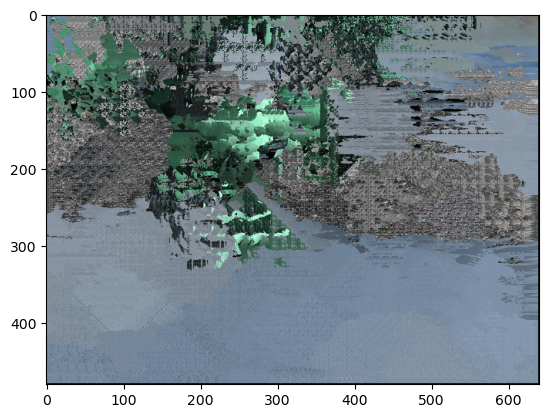

In [81]:
import matplotlib.pyplot as plt
with open('./predicted_img_log.pickle', 'rb') as inputfile:
  predicted_img_log = pickle.load(inputfile)
plt.imshow(predicted_img_log.astype('uint8'))